In [30]:
pwd

'/Users/laurenhughes/Documents/Flatiron/Project '

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline 

In [32]:
#Here I am importing the source data - taken from NHS workforce statistics data. I have just selected the Gender source data. 

nhs_gen = pd.read_excel('/Users/laurenhughes/Flatiron/NHSWFD.xlsx', sheet_name='Source data - Gender')

In [33]:
nhs_gen

,Data Month,Main staff group,Staff group 1,Gender,Grade,HC
0,2009-09-30,All staff groups,All staff groups,All genders,All grades,1154679
1,2009-09-30,All staff groups,All staff groups,Female,All grades,895160
2,2009-09-30,All staff groups,All staff groups,Male,All grades,259519
3,2009-09-30,NHS infrastructure support,All staff groups,All genders,All grades,215502
4,2009-09-30,NHS infrastructure support,All staff groups,Female,All grades,147491
...,...,...,...,...,...,...
6188,2020-12-31,Support to clinical staff,Support to ST&T staff,Male,Band 7,352
6189,2020-12-31,Support to clinical staff,Support to ST&T staff,Male,Band 8a,67
6190,2020-12-31,Support to clinical staff,Support to ST&T staff,Male,Band 8b,13
6191,2020-12-31,Support to clinical staff,Support to ST&T staff,Male,Band 8c,4


In [34]:
nhs_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6193 entries, 0 to 6192
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Data Month        6193 non-null   datetime64[ns]
 1   Main staff group  6193 non-null   object        
 2   Staff group 1     6193 non-null   object        
 3   Gender            6193 non-null   object        
 4   Grade             6193 non-null   object        
 5   HC                6193 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 290.4+ KB


In [35]:
nhs_gen['Staff group 1'].value_counts()

Central functions                            546
Support to doctors, nurses & midwives        539
Support to ST&T staff                        515
Managers                                     513
Unknown                                      511
Nurses & health visitors                     499
Hotel, property & estates                    495
Support to ambulance staff                   446
Scientific, therapeutic & technical staff    435
HCHS Doctors                                 429
Ambulance staff                              382
Senior managers                              357
Midwives                                     331
All staff groups                             195
Name: Staff group 1, dtype: int64

In [36]:
#Here I am isolating the data for scientific / technical / therapeutic staff 

nhs_gens = nhs_gen.loc[nhs_gen['Staff group 1'] == 'Scientific, therapeutic & technical staff']
nhs_gens

,Data Month,Main staff group,Staff group 1,Gender,Grade,HC
327,2009-09-30,Professionally qualified clinical staff,"Scientific, therapeutic & technical staff",All genders,All grades,137252
328,2009-09-30,Professionally qualified clinical staff,"Scientific, therapeutic & technical staff",All genders,Band 4,7168
329,2009-09-30,Professionally qualified clinical staff,"Scientific, therapeutic & technical staff",All genders,Band 5,25811
330,2009-09-30,Professionally qualified clinical staff,"Scientific, therapeutic & technical staff",All genders,Band 6,43050
331,2009-09-30,Professionally qualified clinical staff,"Scientific, therapeutic & technical staff",All genders,Band 7,35942
...,...,...,...,...,...,...
6071,2020-12-31,Professionally qualified clinical staff,"Scientific, therapeutic & technical staff",Male,Band 8b,1653
6072,2020-12-31,Professionally qualified clinical staff,"Scientific, therapeutic & technical staff",Male,Band 8c,837
6073,2020-12-31,Professionally qualified clinical staff,"Scientific, therapeutic & technical staff",Male,Band 8d,436
6074,2020-12-31,Professionally qualified clinical staff,"Scientific, therapeutic & technical staff",Male,Band 9,159


In [37]:
#Here I am isolating the data from December 2020 as the source data contained the counts in all months of 2020

nhs_gens2 = nhs_gens.loc[nhs_gens['Data Month'] == '2020-12-31']

In [38]:
#Here I am extracting the data for Males and Females as I do not need the All Genders data 

nhs_genm = nhs_gens2.loc[nhs_gens2['Gender'] == 'Male']
nhs_genf = nhs_gens2.loc[nhs_gens2['Gender'] == 'Female']

In [39]:
nhs_genmf = nhs_genm.iloc[1:10, 4:6]
nhs_genff = nhs_genf.iloc[1:10, 4:6]

In [40]:
nhs_genmf = nhs_genmf.rename(columns={'HC' : 'Males'})

In [41]:
nhs_genmf

,Grade,Males
6066,Band 4,1108
6067,Band 5,7733
6068,Band 6,12671
6069,Band 7,9907
6070,Band 8a,4772
6071,Band 8b,1653
6072,Band 8c,837
6073,Band 8d,436
6074,Band 9,159


In [42]:
nhs_genff = nhs_genff.rename(columns={'HC' : 'Females'})

In [43]:
nhs_genmf['Females'] = (nhs_genff['Females'])

In [44]:
nhs_genff

,Grade,Females
6055,Band 4,5209
6056,Band 5,25799
6057,Band 6,45582
6058,Band 7,37535
6059,Band 8a,14829
6060,Band 8b,4546
6061,Band 8c,1923
6062,Band 8d,537
6063,Band 9,122


In [45]:
#Here I am moving the female employee counts into the same table as the male employee counts 

nhs_genmf['Females'] = nhs_genff['Females'].values

In [56]:
nhs_genmf

,Grade,Males,Females
6066,Band 4,1108,5209
6067,Band 5,7733,25799
6068,Band 6,12671,45582
6069,Band 7,9907,37535
6070,Band 8a,4772,14829
6071,Band 8b,1653,4546
6072,Band 8c,837,1923
6073,Band 8d,436,537
6074,Band 9,159,122


In [47]:
#Here I am adding a row for total, 
#and then summing the male and female columns to obtain the total number of male and female employees 

nhs_genmf2 = nhs_genmf.append({'Grade' : 'Total', 
                               'Males' : (nhs_genmf['Males'].sum()), 
                               'Females' : (nhs_genmf['Females'].sum())} , 
                              ignore_index=True)
nhs_genmf2

,Grade,Males,Females
0,Band 4,1108,5209
1,Band 5,7733,25799
2,Band 6,12671,45582
3,Band 7,9907,37535
4,Band 8a,4772,14829
5,Band 8b,1653,4546
6,Band 8c,837,1923
7,Band 8d,436,537
8,Band 9,159,122
9,Total,39276,136082


<AxesSubplot:xlabel='Grade'>

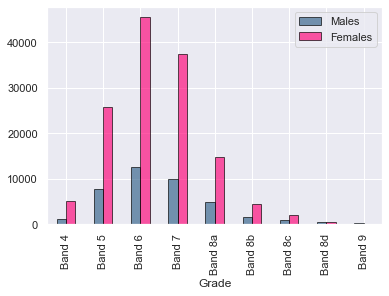

In [48]:
nhs_genmf2[0:9].plot(x="Grade", y=["Males", "Females"], kind="bar",  color=['#306089', '#ff0076'], 
                     alpha=0.65, edgecolor='black')



In [49]:
#Here I am adding a column that shows the % of males and % of females making up each band 

nhs_genmf2['%M'] = nhs_genmf2['Males'] * 100 /(nhs_genmf2['Males'] + nhs_genmf2['Females'])
nhs_genmf2['%F'] = nhs_genmf2['Females'] * 100 /(nhs_genmf2['Males'] + nhs_genmf2['Females'])
np.around(nhs_genmf2, decimals = 1)

,Grade,Males,Females,%M,%F
0,Band 4,1108,5209,17.5,82.5
1,Band 5,7733,25799,23.1,76.9
2,Band 6,12671,45582,21.8,78.2
3,Band 7,9907,37535,20.9,79.1
4,Band 8a,4772,14829,24.3,75.7
5,Band 8b,1653,4546,26.7,73.3
6,Band 8c,837,1923,30.3,69.7
7,Band 8d,436,537,44.8,55.2
8,Band 9,159,122,56.6,43.4
9,Total,39276,136082,22.4,77.6


(0.0, 100.0)

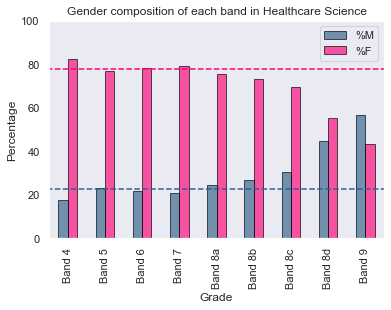

In [50]:
sns.set_theme(style="dark")
nhs_genmf2[0:9].plot(x="Grade", y=["%M", "%F"], kind="bar", 
                     color=['#306089', '#ff0076'], 
                     alpha=0.65, edgecolor='black', 
                     xlabel = 'Grade',
                     ylabel = 'Percentage',
                     title='Gender composition of each band in Healthcare Science')

plt.hlines(22.4, xmin=-1, xmax=9, linestyles='dashed', color='#306089')
plt.hlines(77.6, xmin=-1, xmax=9, linestyles='dashed', color='#ff0076')
plt.ylim([0, 100])


In [51]:
#Here I am adding a column that shows the proportion of total males in each band, and proportion of total 
#females in each band 

nhs_genmf3 = np.around(nhs_genmf2, decimals = 1)
nhs_genmf3['%of_tot_M'] = (nhs_genmf2['Males'] / nhs_genmf['Males'].sum()) * 100
nhs_genmf3['%of_tot_F'] = (nhs_genmf2['Females'] / nhs_genmf['Females'].sum()) * 100

np.around(nhs_genmf3, decimals = 1)

,Grade,Males,Females,%M,%F,%of_tot_M,%of_tot_F
0,Band 4,1108,5209,17.5,82.5,2.8,3.8
1,Band 5,7733,25799,23.1,76.9,19.7,19.0
2,Band 6,12671,45582,21.8,78.2,32.3,33.5
3,Band 7,9907,37535,20.9,79.1,25.2,27.6
4,Band 8a,4772,14829,24.3,75.7,12.1,10.9
5,Band 8b,1653,4546,26.7,73.3,4.2,3.3
6,Band 8c,837,1923,30.3,69.7,2.1,1.4
7,Band 8d,436,537,44.8,55.2,1.1,0.4
8,Band 9,159,122,56.6,43.4,0.4,0.1
9,Total,39276,136082,22.4,77.6,100.0,100.0


<AxesSubplot:title={'center':'Distribution of genders across different bands in healthcare science'}, xlabel='Grade', ylabel='Percentage of total gender'>

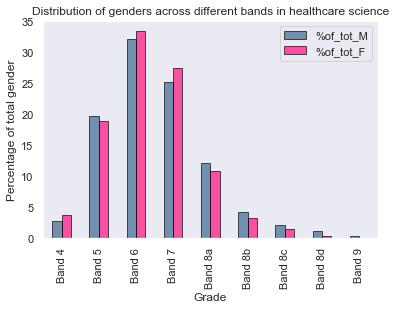

In [52]:
sns.set_theme(style="dark")
nhs_genmf3[0:9].plot(x="Grade", y=["%of_tot_M", "%of_tot_F"], kind="bar", 
                     color=['#306089', '#ff0076'], 
                     alpha=0.65, edgecolor='black', 
                     xlabel = 'Grade',
                     ylabel = 'Percentage of total gender',
                     title='Distribution of genders across different bands in healthcare science')

In [53]:
nhs_genmf3['Ratio%M:F'] = (nhs_genmf3['%of_tot_M'] / nhs_genmf3['%of_tot_F'])
np.around(nhs_genmf3, decimals = 1)

,Grade,Males,Females,%M,%F,%of_tot_M,%of_tot_F,Ratio%M:F
0,Band 4,1108,5209,17.5,82.5,2.8,3.8,0.7
1,Band 5,7733,25799,23.1,76.9,19.7,19.0,1.0
2,Band 6,12671,45582,21.8,78.2,32.3,33.5,1.0
3,Band 7,9907,37535,20.9,79.1,25.2,27.6,0.9
4,Band 8a,4772,14829,24.3,75.7,12.1,10.9,1.1
5,Band 8b,1653,4546,26.7,73.3,4.2,3.3,1.3
6,Band 8c,837,1923,30.3,69.7,2.1,1.4,1.5
7,Band 8d,436,537,44.8,55.2,1.1,0.4,2.8
8,Band 9,159,122,56.6,43.4,0.4,0.1,4.5
9,Total,39276,136082,22.4,77.6,100.0,100.0,1.0


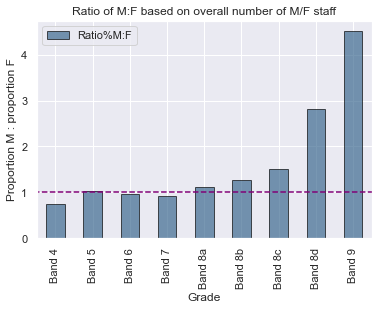

In [60]:
sns.set_theme(style="darkgrid")
nhs_genmf3[0:9].plot(x="Grade", y=["Ratio%M:F"], kind="bar", 
                     color=['#306089', '#ff0076'], 
                     alpha=0.65, edgecolor='black', 
                     xlabel = 'Grade',
                     ylabel = 'Proportion M : proportion F',
                     title='Ratio of M:F based on overall number of M/F staff')

plt.hlines(1.0, xmin=-1, xmax=9, linestyles='dashed', color='#800076')


In [58]:
nhs_genmf3.to_csv('HCS_Genderdata.csv')